In [17]:
import pandas as pd

## Checagem preliminar dos dados

In [18]:
df = pd.read_csv("..\data\external\ordenamiento.csv")

In [19]:
df.head()

,item_id,vertical,category,domain,score
0,512208310,CPG,PETS FOOD,MLC-CATS_AND_DOGS_FOODS,0.0272
1,468513076,CE,ELECTRONICS,MLC-RANGES,0.9256
2,614337410,CE,ELECTRONICS,MLC-SMART_SPEAKERS,0.8304
3,634351318,APP & SPORTS,APPAREL,MLC-PANTS,0.0560
4,528383704,ACC,VEHICULAR MULTIMEDIA,MLC-GPS,0.2334


In [20]:
print(f"Os dados brutos são compostos por {df.shape[1]} features (colunas) e {df.shape[0]} amostras (linhas)")

Os dados brutos são compostos por 5 features (colunas) e 5000 amostras (linhas)


## Verificação gráfica de dados faltantes

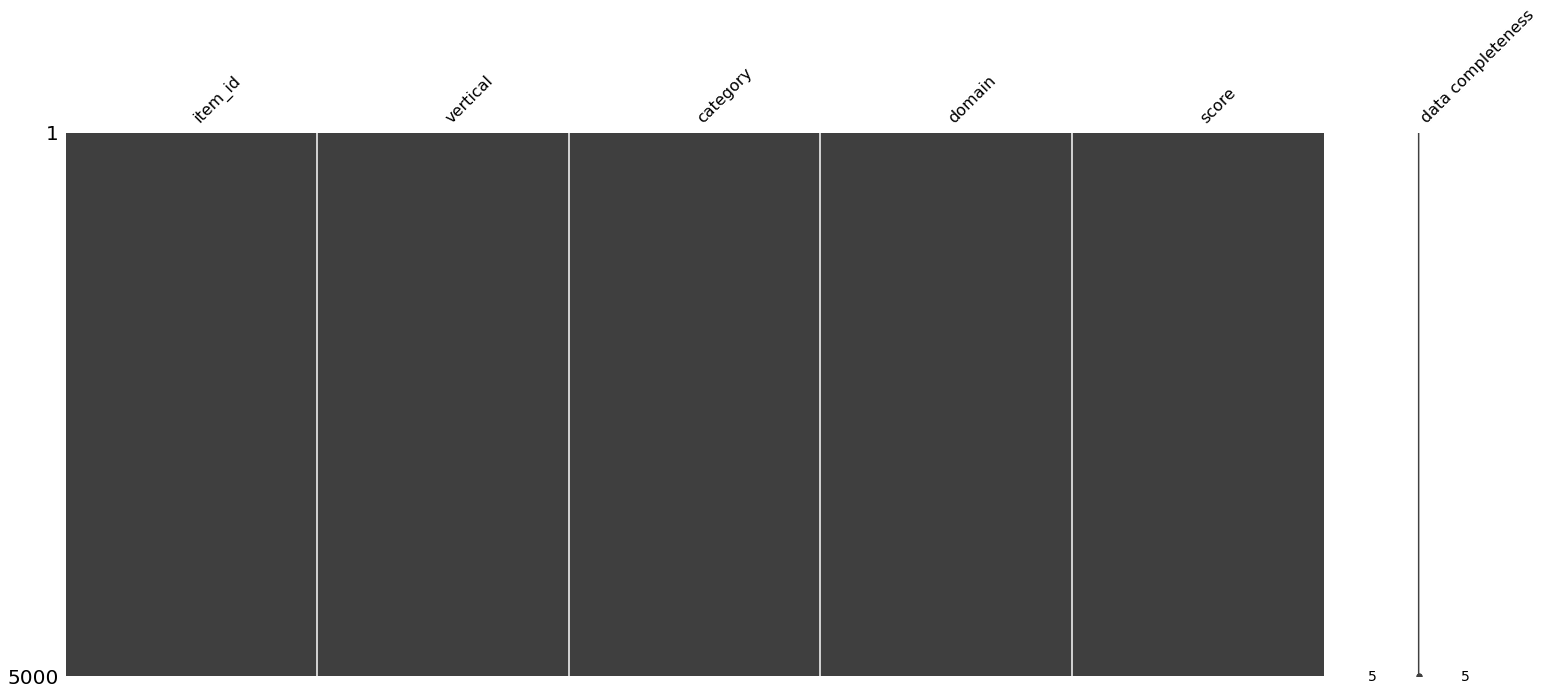

In [21]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

### Estrutura dos dados

## Verificação gráfica da dispersão dos valores das features numéricas

````python
lw=0: lw stands for line width. 0 means that we don’t want to show any lines
marker=".": Instead of lines, we tell the plot to use . as markers for each data point
subplots=True: subplots tells pandas to plot each feature in a separate subplot
layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.
````

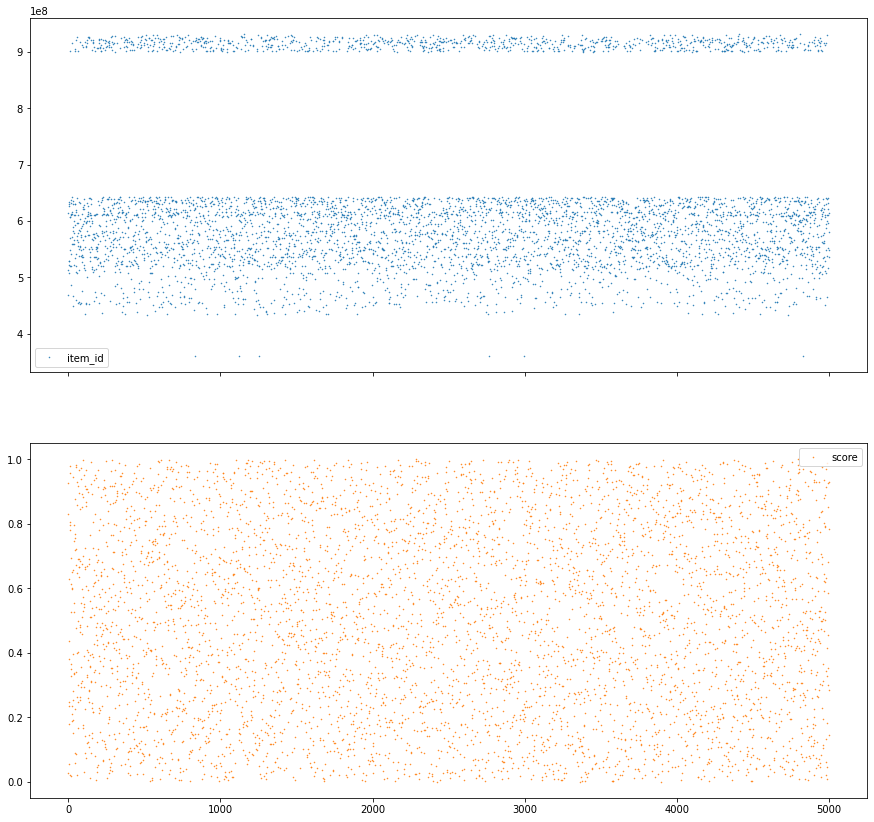

In [22]:
df.plot(lw=0, marker=".", subplots=True, layout=(4, -1),
          figsize=(15, 30), markersize=1);

Cada ponto nesta figura é uma amostra (ou seja, uma linha) em nosso conjunto de dados e cada subplot representa um feature (coluns) diferente. O eixo y mostra o valor da feature, enquanto o eixo x é o índice de amostra.

In [23]:
df.describe()

,item_id,score
count,5.000000e+03,5000.000000
mean,6.350796e+08,0.499901
std,1.443661e+08,0.288703
min,3.600060e+08,0.000000
25%,5.419462e+08,0.249950
50%,5.972171e+08,0.499900
75%,6.368722e+08,0.749850
max,9.317607e+08,0.999800


## Inspesção do tipo dos dados

In [24]:
# Importando as funções próprias de análise
from summary import print_type_info

In [25]:
df_info = print_type_info(df)
df_info

,Coluna,Type,Type_Count,Null_Count,None_Count,Unique_Valor
0,item_id,int64,5000,0,0,"[512208310, 468513076, 614337410, 634351318, 528383704, 507642148, 521057099..."
1,vertical,object,9,0,0,"[CPG, CE, APP & SPORTS, ACC, HOME & INDUSTRY, BEAUTY & HEALTH, T & B, ENTERT..."
2,category,object,35,0,0,"[PETS FOOD, ELECTRONICS, APPAREL, VEHICULAR MULTIMEDIA, HOME&DECOR, AUTOPART..."
3,domain,object,773,0,0,"[MLC-CATS_AND_DOGS_FOODS, MLC-RANGES, MLC-SMART_SPEAKERS, MLC-PANTS, MLC-GPS..."
4,score,float64,4969,0,0,"[0.0272, 0.9256, 0.8304, 0.056, 0.2334, 0.3796, 0.4352, 0.2476, 0.6292, 0.18..."


## Quais dados fazem sentido para a análise?


In [26]:
df.head(10)

,item_id,vertical,category,domain,score
0,512208310,CPG,PETS FOOD,MLC-CATS_AND_DOGS_FOODS,0.0272
1,468513076,CE,ELECTRONICS,MLC-RANGES,0.9256
2,614337410,CE,ELECTRONICS,MLC-SMART_SPEAKERS,0.8304
3,634351318,APP & SPORTS,APPAREL,MLC-PANTS,0.0560
4,528383704,ACC,VEHICULAR MULTIMEDIA,MLC-GPS,0.2334
5,507642148,HOME & INDUSTRY,HOME&DECOR,MLC-STOOLS,0.3796
6,521057099,HOME & INDUSTRY,HOME&DECOR,MLC-QUILTS_AND_COVERLETS,0.4352
7,529123507,CE,ELECTRONICS,MLC-BLENDERS,0.2476
8,630745490,HOME & INDUSTRY,HOME&DECOR,MLC-CORKSCREWS,0.6292
9,627255896,ACC,AUTOPARTS,MLC-VEHICLE_MULTIMEDIA_SYSTEMS,0.1804



### Descrição das fetures 


### Remoção de linhas duplicadas

In [27]:
len(df)

5000